In [22]:
"""
show test result of charge amp, data took by Robin
Aur: Jiancheng Zeng
Date: Feb 9, 2023
"""

'\nshow test result of charge amp, data took by Robin\nAur: Jiancheng Zeng\nDate: Feb 9, 2023\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [46]:
#Function that Calculate Root Mean Square
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
     
    #Calculate square
    for i in range(0,n):
        square += (arr[i]**2)
     
    #Calculate Mean
    mean = (square / (float)(n))
     
    #Calculate Root
    root = math.sqrt(mean)
     
    return root

#read data from
data = pd.read_csv('/home/jiancheng/GRAMS/Charge_preamp/data/2SK932_6us_SigOn_acq1.csv', names=range(2), on_bad_lines = None, skiprows = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#print(data)

V_in = 0.012    #input sqaure wave amplitude
E_Ar = 25    #Argon energy factor 25eV
C_in = 4e-12    #injection capacitor

#calculate energy-signal transfer variable, keV
Trans = E_Ar/(1.6e-19)*C_in*V_in/1000
print(Trans)

#calculate each V equal to # of keV
V_T = Trans/max(data.loc[:,1])
print(V_T)

#calculate rms, 3000 is just to avoid peak
RMS = rmsValue(data.loc[:,1][0:3000], 3000)

#calculate FWHM
FWHM = RMS * 2.35 * V_T

print('Energy FWHM is ' + str(round(FWHM,2)) + 'keV')


7500.0
3700.8990132868867
Energy FWHM is 19.55keV


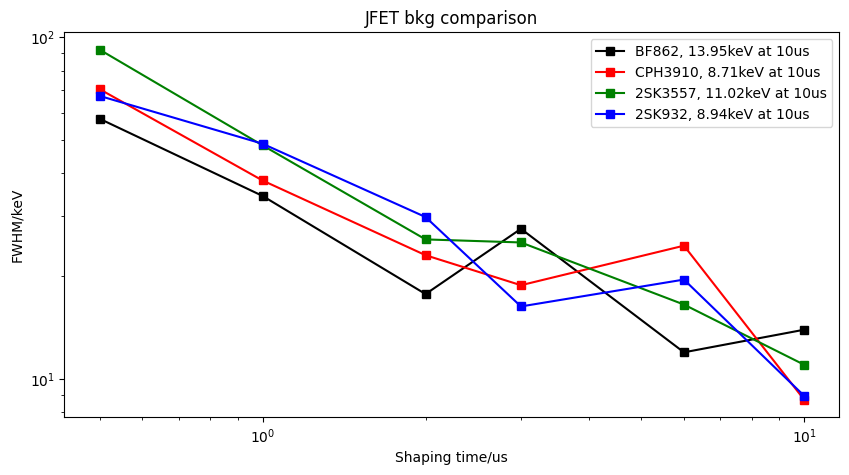

In [43]:
#BF862, shaping time [0.5us, 1us, 2us, 3us, 6us, 10us]
FWHM_1 = [57.83, 34.37, 17.74, 27.54, 11.98, 13.95]
#CPH3910, shaping time [0.5us, 1us, 2us, 3us, 6us, 10us]
FWHM_2 = [70.60, 38.14, 23.05, 18.83, 24.58, 8.71]
#2SK3557, shaping time [0.5us, 1us, 2us, 3us, 6us, 10us]
FWHM_3 = [92.13, 48.33, 25.64, 25.12, 16.53, 11.02]
#2SK932, shaping time [0.5us, 1us, 2us, 3us, 6us, 10us]
FWHM_4 = [67.45, 48.86, 29.81, 16.32, 19.56, 8.94]

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(111)

xx = [0.5, 1, 2, 3, 6, 10]
ax1.plot(xx, FWHM_1, c='k', marker="s", label=f'BF862, %0.2fkeV at 10us'%FWHM_1[5])
ax1.plot(xx, FWHM_2, c='r', marker="s", label=f'CPH3910, %0.2fkeV at 10us'%FWHM_2[5])
ax1.plot(xx, FWHM_3, c='g', marker="s", label=f'2SK3557, %0.2fkeV at 10us'%FWHM_3[5])
ax1.plot(xx, FWHM_4, c='b', marker="s", label=f'2SK932, %0.2fkeV at 10us'%FWHM_4[5])
#ax1.set_xticks([])
ax1.set_xlabel('Shaping time/us')
ax1.set_ylabel('FWHM/keV')
ax1.set_title('JFET bkg comparison')
ax1.set_yscale("log")
ax1.set_xscale("log")

plt.legend()
plt.show()